Pre process the data

Loaded dataset with shape: (5179742, 11)
Selected 8 essential columns: PERMNO, MthCalDt, MthRet, sprtrn, CUSIP, SICCD, NAICS, PERMCO

=== First 5 rows of the dataset ===

=== Missing Values Summary ===
        Missing Values  Percentage
CUSIP           571542   11.034179
MthRet           83530    1.612629
sprtrn             509    0.009827


/home/Loris/EPFL/MA2/MLFIN/Project/preprocessing/preprocessing_returns.py:315: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  market_returns[self.market_return_column] = market_returns[self.market_return_column].fillna(method='ffill').fillna(method='bfill')


Filled 509 missing market returns using time-series interpolation.


/home/Loris/EPFL/MA2/MLFIN/Project/preprocessing/preprocessing_returns.py:332: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  self.data['CUSIP'] = self.data.groupby(self.id_column)['CUSIP'].fillna(method='ffill')
/home/Loris/EPFL/MA2/MLFIN/Project/preprocessing/preprocessing_returns.py:332: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.data['CUSIP'] = self.data.groupby(self.id_column)['CUSIP'].fillna(method='ffill')
/home/Loris/EPFL/MA2/MLFIN/Project/preprocessing/preprocessing_returns.py:332: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_opti

Filled 396841 missing CUSIP values within security groups.
Note: 174701 CUSIP values remain missing for securities with no valid CUSIP.
Removed 83530 rows with missing return values.
Total rows removed: 83530 (1.61% of original data)
Date conversion complete.

=== Dataset Overview ===
Shape: (5096212, 8)

=== Data Types ===
PERMNO               int64
MthCalDt    datetime64[ns]
MthRet             float64
CUSIP               object
SICCD                int64
NAICS                int64
PERMCO               int64
sprtrn             float64
dtype: object

=== Return Statistics ===
count    5.096212e+06
mean     9.970718e-03
std      1.744244e-01
min     -1.000000e+00
25%     -5.691100e-02
50%      1.520000e-04
75%      6.130900e-02
max      3.900000e+01
Name: MthRet, dtype: float64

=== Categorical Columns ===
CUSIP: 52377 unique values


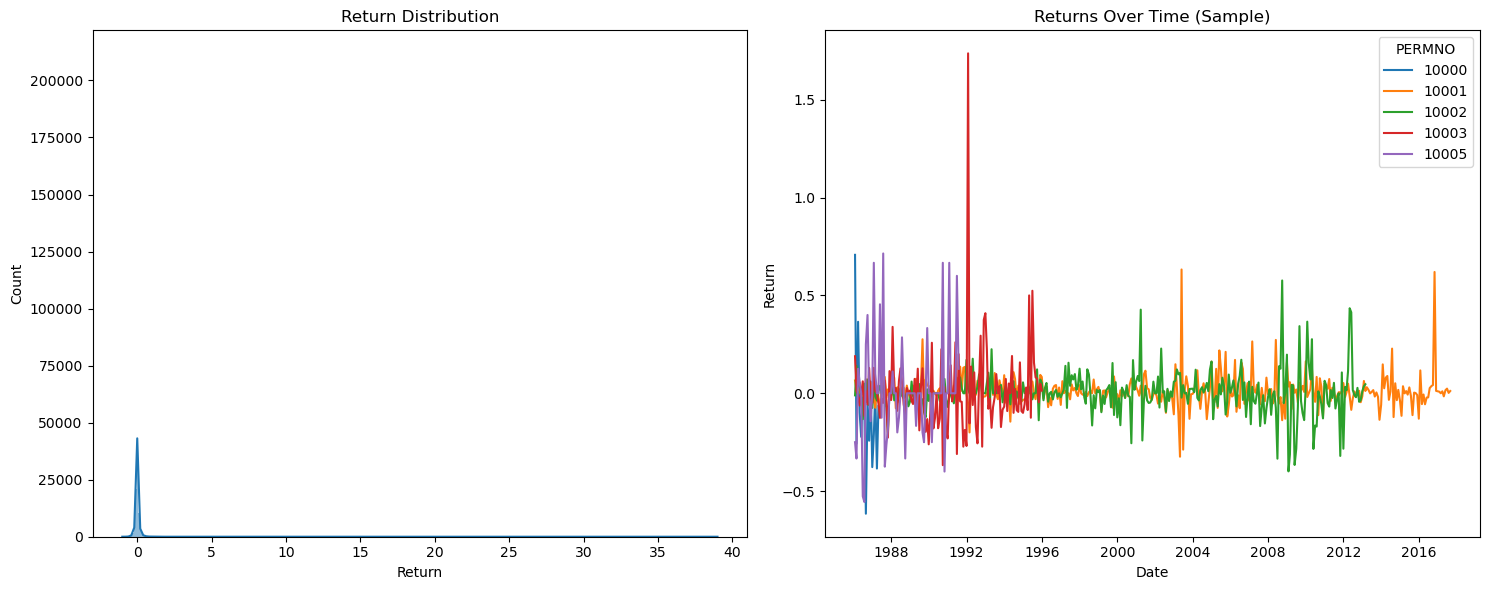


=== Time Range ===
Dataset spans from 1926-01-30 00:00:00 to 2024-12-31 00:00:00

=== Securities ===
Dataset contains 38851 unique securities

=== Observations per Security ===
Mean: 131.17
Median: 78.00
Min: 1
Max: 1405

=== Extreme Returns ===
Found 76136 returns with absolute value > 50.0%
     PERMNO   MthCalDt    MthRet     CUSIP  SICCD   NAICS  PERMCO    sprtrn
0     10000 1986-01-31  0.707317  68391610   3990       0    7952  0.002367
7     10000 1986-08-29 -0.615385  68391610   3990       0    7952  0.071193
227   10001 2003-05-30  0.632495  29274A10   4920       0    7953  0.050899
389   10001 2016-10-31  0.619769  36720410   4925  221210    7953 -0.019426
673   10002 2008-09-30  0.576326  05978R10   6020  551111    7954 -0.090791

=== Return-Market Correlation ===
         MthRet   sprtrn
MthRet  1.00000  0.26722
sprtrn  0.26722  1.00000
Data exported to PostProcessed/Returns/processed_returns.parquet


'PostProcessed/Returns/processed_returns.parquet'

In [1]:
from preprocessing.preprocessing_returns import ReturnPreprocessor

# Set the file path to your returns dataset
file_path = "datasets/Targets/monthly_crsp.csv"  # Replace with your actual file path

# Create an instance of the ReturnPreprocessor
processor = ReturnPreprocessor(
    id_column='PERMNO',
    date_column='MthCalDt',
    return_column='MthRet',
    market_return_column='sprtrn'
)

# Load the dataset (use nrows parameter if the dataset is very large)
# For example, to load just the first 100,000 rows for initial exploration:
processor.load(file_path)

processor.select_essential_columns()

# Display the first few rows of the dataset
print("\n=== First 5 rows of the dataset ===")
processor.data.head()

# Check for missing values in the dataset
missing_values = processor.check_missing_values()

# Handle missing values
processor.handle_missing_values()

# Convert date column to datetime format
processor.convert_dates()

# Get summary statistics about the dataset
processor.summarize()

# Plot return distribution and time series
processor.plot_returns_overview(sample_size=5)

# Additional analysis: Check the time range of the dataset
min_date = processor.data[processor.date_column].min()
max_date = processor.data[processor.date_column].max()
print(f"\n=== Time Range ===")
print(f"Dataset spans from {min_date} to {max_date}")

# Count the number of unique securities in the dataset
unique_securities = processor.data[processor.id_column].nunique()
print(f"\n=== Securities ===")
print(f"Dataset contains {unique_securities} unique securities")

# Calculate average number of observations per security
obs_per_security = processor.data.groupby(processor.id_column).size()
print(f"\n=== Observations per Security ===")
print(f"Mean: {obs_per_security.mean():.2f}")
print(f"Median: {obs_per_security.median():.2f}")
print(f"Min: {obs_per_security.min()}")
print(f"Max: {obs_per_security.max()}")

# Check for extreme returns
extreme_threshold = 0.5  # 50% return in a month
extreme_returns = processor.data[abs(processor.data[processor.return_column]) > extreme_threshold]
print(f"\n=== Extreme Returns ===")
print(f"Found {len(extreme_returns)} returns with absolute value > {extreme_threshold*100}%")
if len(extreme_returns) > 0:
    print(extreme_returns.head())

# Correlation between stock returns and market returns
correlation = processor.data[[processor.return_column, processor.market_return_column]].corr()
print(f"\n=== Return-Market Correlation ===")
print(correlation)

# Get the processed data for further analysis or modeling
returns_data = processor.get_data()

# Optional: Export the processed data to a parquet file for efficient storage
processor.export("PostProcessed/Returns/processed_returns.parquet", format="parquet")


Pre processinf of JKP Predictor

Loaded dataset with shape: (144620, 9)

=== Dataset Overview ===
Shape: (144620, 9)

=== Data Types ===
location         object
name             object
freq             object
weighting        object
direction         int64
n_stocks          int64
n_stocks_min      int64
date             object
ret             float64
dtype: object

=== Missing Values ===
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []

=== Factor Return Statistics ===
count    144620.000000
mean          0.002046
std           0.030145
min          -0.594595
25%          -0.009873
50%           0.001795
75%           0.013829
max           0.542959
Name: ret, dtype: float64

=== Categorical Columns ===
location: 1 unique values
Values: ['usa']
name: 153 unique values
freq: 1 unique values
Values: ['monthly']
weighting: 1 unique values
Values: ['vw_cap']
date: 1188 unique values

=== Time Range ===
From 1926-01-31 00:00:00 to 2024-12-31 00:00:00

=== Factor Count ===
Dataset contains 153 unique factors


/home/Loris/EPFL/MA2/MLFIN/Project/preprocessing/preprocessing_jkp.py:422: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.factor_data = self.factor_data.fillna(method='ffill').fillna(method='bfill')
/home/Loris/EPFL/MA2/MLFIN/Project/preprocessing/preprocessing_jkp.py:452: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.factor_data[lag_col_name] = self.factor_data[col].shift(lag)
/home/Loris/EPFL/MA2/MLFIN/Project/preprocessing/preprocessing_jkp.py:452: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Created 612 lagged features.
First 12 rows dropped due to lagging.
Creating rolling features with windows: [3, 6, 12]...


/home/Loris/EPFL/MA2/MLFIN/Project/preprocessing/preprocessing_jkp.py:507: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.factor_data[feature_name] = self.factor_data[col].rolling(
/home/Loris/EPFL/MA2/MLFIN/Project/preprocessing/preprocessing_jkp.py:507: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.factor_data[feature_name] = self.factor_data[col].rolling(
/home/Loris/EPFL/MA2/MLFIN/Project/preprocessing/preprocessing_jkp.py:507: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Created 4590 rolling features.


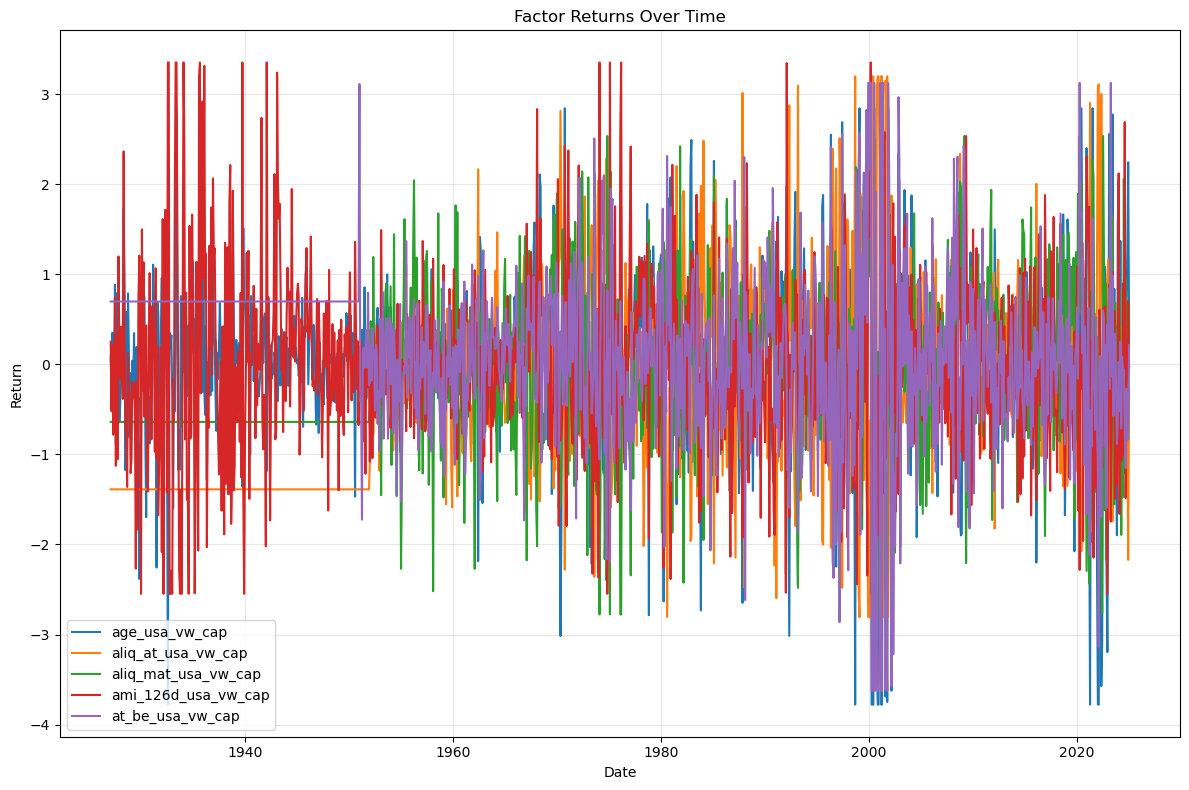

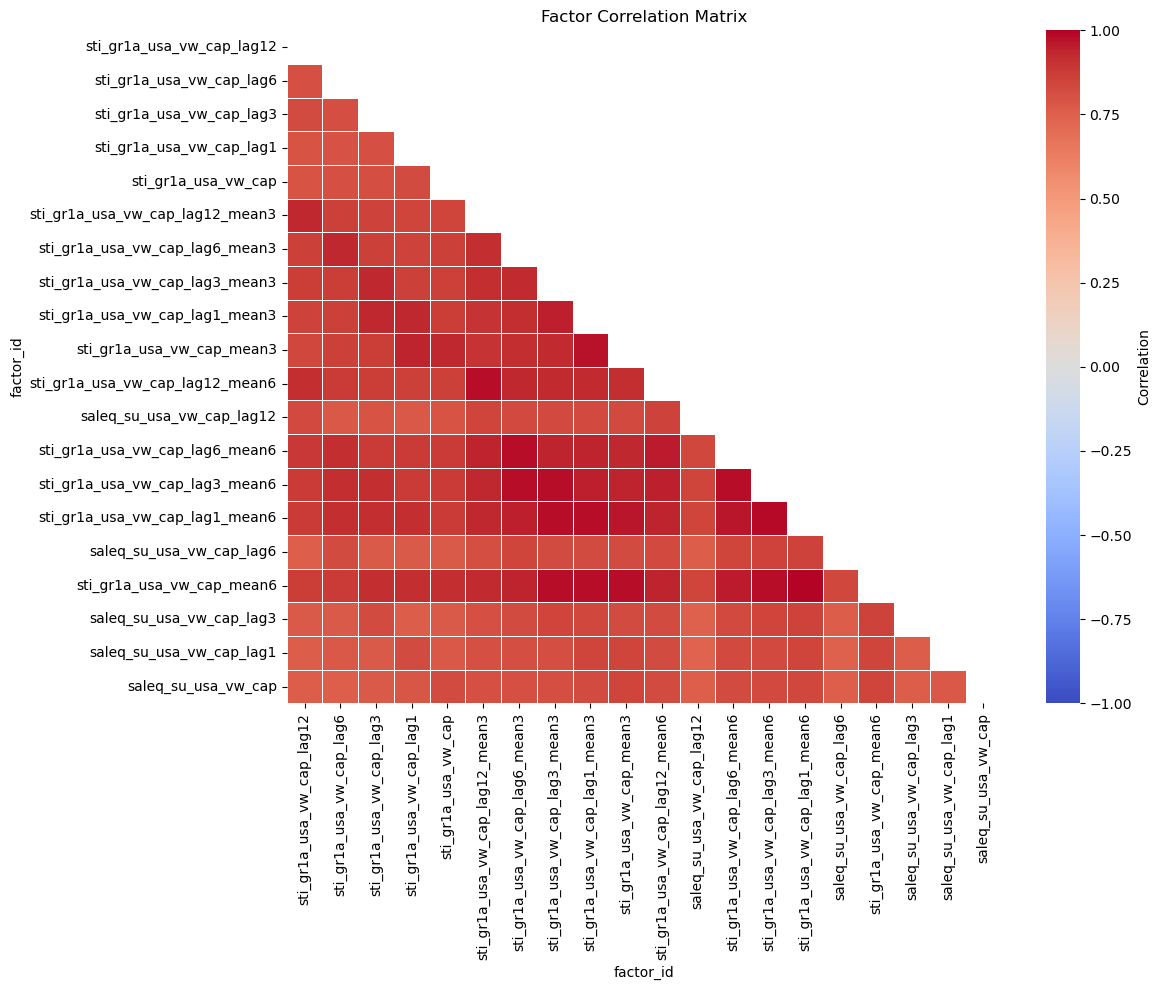


=== Processed Factor Data ===
factor_id   age_usa_vw_cap  aliq_at_usa_vw_cap  aliq_mat_usa_vw_cap  \
date                                                                  
1927-01-31        0.087537           -1.388297            -0.639734   
1927-02-28       -0.393489           -1.388297            -0.639734   
1927-03-31        0.350038           -1.388297            -0.639734   
1927-04-30       -0.581794           -1.388297            -0.639734   
1927-05-31       -0.325239           -1.388297            -0.639734   

factor_id   ami_126d_usa_vw_cap  at_be_usa_vw_cap  at_gr1_usa_vw_cap  \
date                                                                   
1927-01-31             0.249771          0.697212          -0.639339   
1927-02-28            -0.520856          0.697212          -0.639339   
1927-03-31             0.221101          0.697212          -0.639339   
1927-04-30            -0.781551          0.697212          -0.639339   
1927-05-31            -0.452022        

'processed_jkp_factors.parquet'

In [ ]:
# Import necessary libraries
from preprocessing.preprocessing_jkp import JkpPreprocessor


# Define the PredictorPreprocessor class
# [Insert the PredictorPreprocessor class definition here]

# Now let's use the class to preprocess the JKP factor dataset

# Set the file path to the JKP factor dataset
file_path = "datasets/Predictors/[usa]_[all_factors]_[monthly]_[vw_cap].csv"  # Replace with your actual file path

# Create an instance of the PredictorPreprocessor
processor = JkpPreprocessor(
    date_column='date',
    return_column='ret'
)

# Load the dataset
processor.load(file_path)

# Explore the dataset
processor.explore_data()

# Convert dates to datetime format
processor.convert_dates()

# Handle missing values using forward fill within each factor group
processor.handle_missing_values(method='ffill')

# Pivot the data to create a time series of factor returns
processor.pivot_factors()

# Handle outliers using winsorization
processor.handle_outliers(method='winsorize')

# Normalize the factor returns using standardization
processor.normalize_factors(method='standardize')

# Create lagged features
processor.create_lagged_features(lags=[1, 3, 6, 12])

# Create rolling window features
processor.create_rolling_features(windows=[3, 6, 12], functions=['mean', 'std'])

# Plot factor returns for a sample of factors
processor.plot_factor_returns(n_factors=5)

# Plot factor correlations
processor.plot_factor_correlations(n_factors=20)

# Optional: Reduce dimensions using PCA
# processor.reduce_dimensions(variance_threshold=0.95)

# Get the processed factor data
factor_data = processor.get_data()

# Display the first few rows of the processed data
print("\n=== Processed Factor Data ===")
print(factor_data.head())

# Export the processed data
processor.export("datasets/PostProcessed/Predictors/processed_jkp_factors.parquet", format="parquet")
